In [101]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'plt', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [102]:
raw_data2 = pd.read_csv("../dataun.csv")
raw_data1 = pd.read_csv("../datamags2.csv")

In [103]:
import seaborn as sns; sns.set() # Visualization

In [3]:
data2 = raw_data2[['u', 'g', 'r', 'i', 'z', 'redshift']]
data1 = raw_data1[['u', 'g', 'r', 'i', 'z', 'redshift']][:150000]

In [5]:
shape(data2)

(100425, 6)

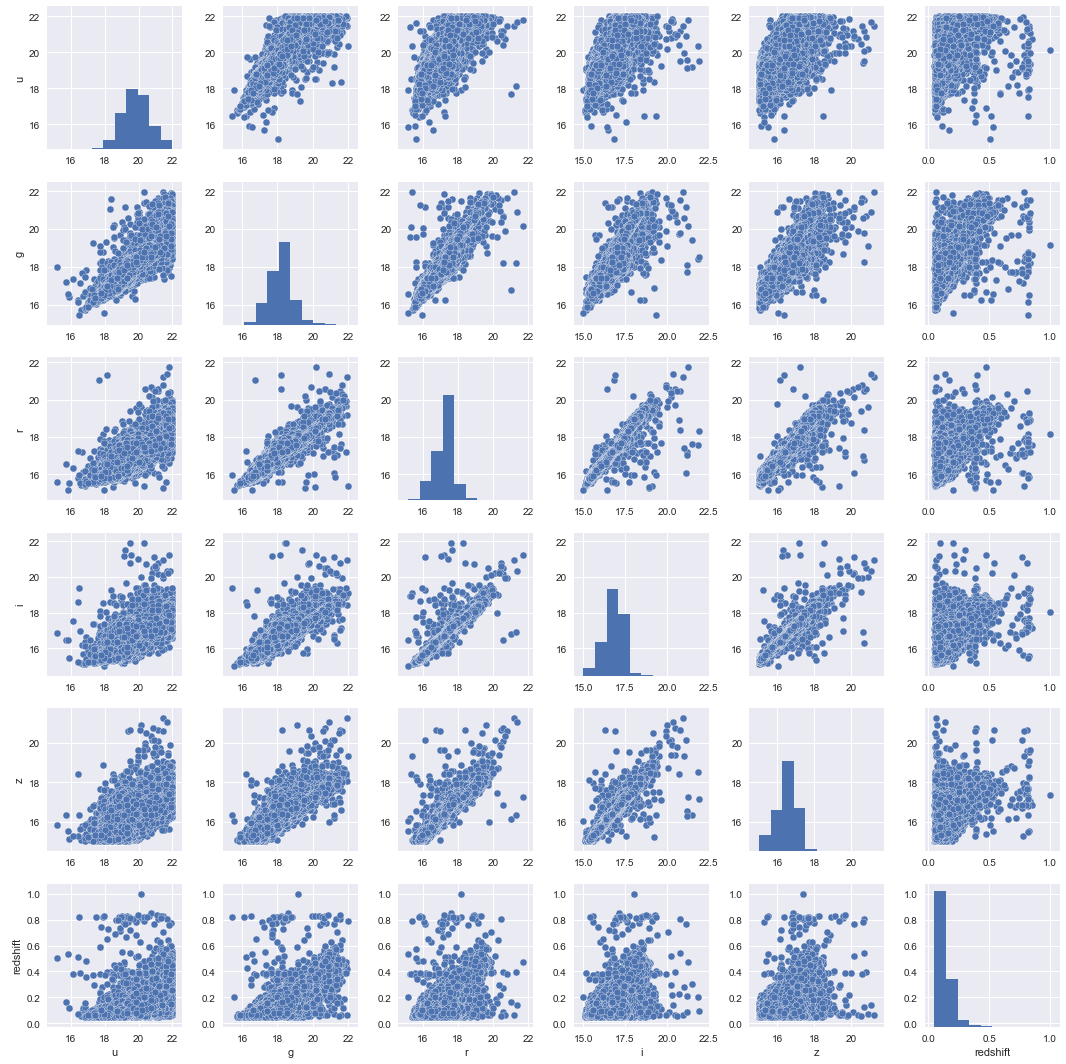

In [6]:
g = sns.pairplot(data1 ) # Pairwise scatterplots

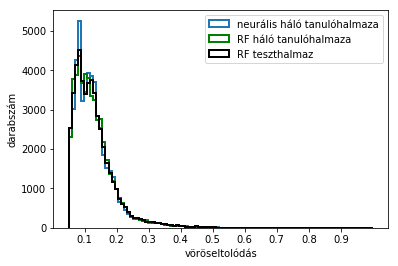

In [42]:
f = figure()
from matplotlib import pyplot
bins = numpy.linspace(0.05, 1, 100)
xticks(np.arange(0, 1, step=0.1))

h1 = pyplot.hist(data1.redshift[:50000], bins, label = 'neurális háló tanulóhalmaza', linewidth = 2, histtype = 'step', density = False)
#h2 = pyplot.hist(data2.redshift, bins,color='green', label = '2-es adathalmaz', linewidth = 2, histtype = 'step', density = False)
h3 = hist(data1.redshift[50000:100000],bins, label = 'RF háló tanulóhalmaza', linewidth = 2, histtype = 'step',density = False, color = 'green')
h3 = hist(data1.redshift[100000:150000],bins, label = 'RF teszthalmaz', linewidth = 2, histtype = 'step',density = False, color = 'black')

xlabel('vöröseltolódás')
ylabel('darabszám')
legend(loc = 'upper right')
f.savefig('hists4.pdf', bbox_inches = 'tight')

In [44]:
average(data1.redshift)

0.12844191811533334

In [45]:
average(data2.redshift)

0.2602652730953448

In [46]:
median(data1.redshift)

0.11591900000000001

In [47]:
median(data2.redshift)

0.27428400000000003

In [50]:
raw_data1.head(10)

,Unnamed: 0,objId,run,rerun,camcol,field,rowc_r,colc_r,rowc_u,colc_u,...,colc_i,rowc_z,colc_z,u,g,r,i,z,redshift,zErr
0,0,587722952230502748,745,40,2,523,657.5393,1828.7230,665.2546,1833.6120,...,1828.0450,668.4250,1829.7370,19.83570,17.86314,16.89192,16.43411,16.06709,0.077636,0.000162
1,1,587722952230633896,745,40,2,525,810.6829,354.5931,817.3302,358.9155,...,354.3166,821.5765,355.7945,19.43710,18.02472,17.34082,16.94403,16.67712,0.077890,0.000158
2,2,587722952230961460,745,40,2,530,1266.6930,1233.6840,1274.3840,1238.3100,...,1233.4920,1278.5340,1235.6110,19.30926,17.42011,16.58394,16.14614,15.83222,0.078424,0.000161
3,3,587722952767111585,745,40,3,519,919.9477,1138.4200,928.2917,1141.8390,...,1137.7980,931.5354,1138.2090,19.42001,17.67972,16.73363,16.25704,15.89503,0.079119,0.000177
4,4,587722952767242657,745,40,3,521,459.3519,439.3576,467.4019,442.0343,...,437.9276,470.7224,438.6897,19.49589,17.73847,16.68256,16.17361,15.76170,0.142901,0.000151
5,5,587722953304834385,745,40,4,532,598.2883,1266.3880,607.7894,1270.6620,...,1266.6850,610.0355,1267.2250,18.99277,17.43671,16.57238,16.08892,15.80047,0.093793,0.000176
6,6,587722981733695630,752,40,1,146,714.9709,1107.4770,721.9522,1112.2590,...,1105.9120,724.9717,1108.0610,20.38596,18.48756,17.45180,16.94182,16.54852,0.134746,0.000160
7,7,587722981738610821,752,40,1,221,503.3213,1498.4420,508.5632,1502.0290,...,1497.1280,513.0082,1499.7320,19.49619,18.31656,17.77106,17.42179,17.20599,0.079707,0.000092
8,8,587722981738741881,752,40,1,223,1125.7940,1450.8870,1132.6560,1455.0420,...,1449.4180,1135.4710,1451.2950,18.91593,17.09458,16.18447,15.72398,15.38399,0.095117,0.000143
9,9,587722981738938396,752,40,1,226,507.1031,1716.6980,514.0878,1720.8390,...,1715.5030,516.6141,1717.4110,20.42391,19.02524,18.20076,17.66365,17.12729,0.240707,0.000158


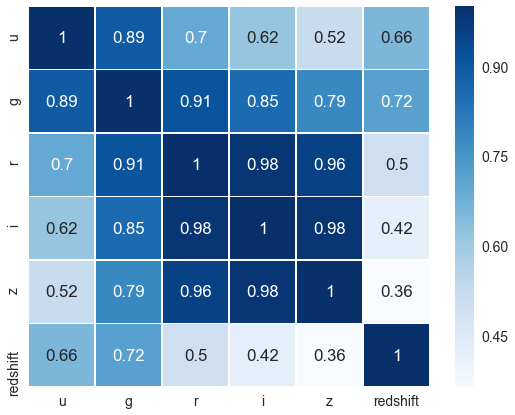

In [71]:
corr = data1.corr()
rc('font', size=16)
sns.set(font_scale=1.4)
f = plt.figure(figsize = (9, 7))
sns.heatmap(corr, cmap='Blues',#cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5)
plt.show()
f.savefig('corrmap2.pdf', bbox_inches = 'tight')

In [113]:
from sklearn import tree
from sklearn import ensemble


In [117]:
X = data1.drop('redshift', axis = 1)[:100000]
y = data1.redshift[:100000]

In [118]:
y_rf =ensemble.RandomForestRegressor(max_depth=15, max_features=3, criterion = 'mse',warm_start = False,
                             n_estimators=200,n_jobs=-1 ,min_samples_split= 25, min_samples_leaf = 120)
y_rf.fit(X, y, sample_weight=None)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=120,
           min_samples_split=25, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [119]:
features = data1.iloc[:,0:5]
features.head()

,u,g,r,i,z
0,19.83570,17.86314,16.89192,16.43411,16.06709
1,19.43710,18.02472,17.34082,16.94403,16.67712
2,19.30926,17.42011,16.58394,16.14614,15.83222
3,19.42001,17.67972,16.73363,16.25704,15.89503
4,19.49589,17.73847,16.68256,16.17361,15.76170


In [120]:

for name, importance in zip(features.dtypes.index, y_rf.feature_importances_):
    print(name, "=", importance)

u = 0.26273247598576005
g = 0.5697622539145375
r = 0.09392848740372753
i = 0.05606738227703649
z = 0.017509400418938854


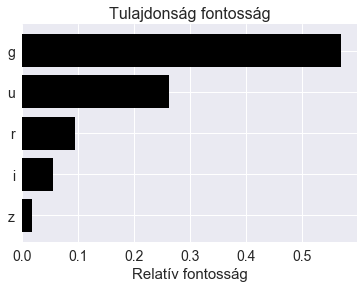

In [121]:

features1 = features.dtypes.index
importances = y_rf.feature_importances_
indices = np.argsort(importances)
f=figure()
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=15)
rc('xtick', labelsize=14)    # fontsize of the tick labels
rc('ytick', labelsize=14)
plt.title('Tulajdonság fontosság')
plt.barh(range(len(indices)), importances[indices], color='k', align='center')
plt.yticks(range(len(indices)), features1[indices])
plt.xlabel('Relatív fontosság')
plt.show()
f.savefig('relf.pdf', bbox_inches = 'tight')

In [ ]:
ypred = 